In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from starfish.set import settings

In [3]:
fisher1=pd.read_excel('../../j-pas/w0wacdm/fisher_ELG.xlsx',header=0,index_col=0)
fisher2=pd.read_excel('fisher.xlsx',header=0,index_col=0)

In [4]:
fisher1

,omega_m0,omega_b0,h,n_s,sigma_8,m_nu,N_eff,w0,wa,p_s1,...,p_s3,p_s4,p_s5,p_s6,lnbs1,lnbs2,lnbs3,lnbs4,lnbs5,lnbs6
omega_m0,683172.317533,-4.525544e+05,-9.640715e+05,21610.489247,123024.524128,-5247.015684,-3803.914707,117379.317989,24152.411425,228.540405,...,277.356884,131.991288,40.625696,2.371411,60966.065543,178302.694588,279550.310779,206680.290303,76280.089847,1869.684195
omega_b0,-452554.430012,1.536510e+06,-6.825953e+05,-331441.613893,88153.326799,30410.293621,13339.537914,61001.169561,10991.154676,-25.459066,...,-75.106316,-29.186257,-3.083183,1.168915,40796.370245,49943.637894,53057.188771,83578.991432,90725.990814,26870.289482
h,-964071.486488,-6.825953e+05,3.141977e+06,407599.216167,-440849.394275,-28883.473172,-6488.130305,-363363.805489,-68447.561235,-707.656435,...,-586.601564,-243.598159,-73.110620,-5.231979,-322346.588261,-585032.914248,-712828.181223,-507469.764720,-230081.822877,-27834.504867
n_s,21610.489247,-3.314416e+05,4.075992e+05,118075.741828,-59524.011634,-9804.775872,-3016.232201,-50484.756434,-9247.618025,-48.190135,...,-28.231668,-12.799106,-5.227070,-0.688024,-39876.235290,-65824.823622,-76581.098190,-64922.935206,-41056.513853,-8396.787106
sigma_8,123024.524128,8.815333e+04,-4.408494e+05,-59524.011634,89009.879606,5160.444673,848.058812,45062.153416,7795.773135,197.191748,...,116.919858,39.740924,10.009439,0.636812,50741.807807,84639.313771,90219.776262,59085.851483,24761.326725,3140.553873
m_nu,-5247.015684,3.041029e+04,-2.888347e+04,-9804.775872,5160.444673,916.793618,270.005244,3636.859671,653.291929,5.252805,...,2.946163,1.103675,0.410292,0.055284,2583.440706,4296.710713,5099.287557,4539.102473,3153.707626,746.992010
N_eff,-3803.914707,1.333954e+04,-6.488130e+03,-3016.232201,848.058812,270.005244,123.502669,549.029649,99.245803,-0.226338,...,-0.644886,-0.244988,-0.021807,0.010667,384.406864,481.482922,515.534816,778.577773,823.713147,241.215203
w0,117379.317989,6.100117e+04,-3.633638e+05,-50484.756434,45062.153416,3636.859671,549.029649,49242.416326,9555.018461,33.072086,...,61.188318,29.416032,9.036149,0.643814,29874.074304,70761.221760,94489.810691,69028.955426,30957.475586,3855.587588
wa,24152.411425,1.099115e+04,-6.844756e+04,-9247.618025,7795.773135,653.291929,99.245803,9555.018461,1940.966835,2.798136,...,11.340773,6.490819,2.213951,0.166666,3222.081504,11156.460084,18512.813088,15520.011725,7567.868865,973.802684
p_s1,228.540405,-2.545907e+01,-7.076564e+02,-48.190135,197.191748,5.252805,-0.226338,33.072086,2.798136,22.013405,...,0.000000,0.000000,0.000000,0.000000,444.590251,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
cosmo_name=settings.var_name[:settings.cosmo_num]
cov1=pd.DataFrame(np.linalg.inv(fisher1.values)[:settings.cosmo_num,:settings.cosmo_num],index=cosmo_name,columns=cosmo_name)
cov1

,omega_m0,omega_b0,h,n_s,sigma_8,m_nu,N_eff,w0,wa
omega_m0,0.001265,0.000271,0.000393,-0.001414,-0.000713,0.006872,-0.008857,0.004349,-0.026944
omega_b0,0.000271,0.000078,0.000143,-0.000338,-0.000048,0.000223,-0.001354,0.000875,-0.005622
h,0.000393,0.000143,0.000655,-0.000632,0.000530,-0.005692,0.011783,0.000360,-0.008313
n_s,-0.001414,-0.000338,-0.000632,0.001851,0.000440,-0.002906,0.006486,-0.004340,0.028268
sigma_8,-0.000713,-0.000048,0.000530,0.000440,0.001688,-0.017774,0.026338,-0.003389,0.017295
m_nu,0.006872,0.000223,-0.005692,-0.002906,-0.017774,0.205219,-0.273145,0.026962,-0.154718
N_eff,-0.008857,-0.001354,0.011783,0.006486,0.026338,-0.273145,0.635238,-0.043024,0.161303
w0,0.004349,0.000875,0.000360,-0.004340,-0.003389,0.026962,-0.043024,0.025425,-0.116040
wa,-0.026944,-0.005622,-0.008313,0.028268,0.017295,-0.154718,0.161303,-0.116040,0.702577


In [6]:
fisher2_valid=fisher2.copy()
for index in fisher2.index:
    if (fisher2_valid.loc[index,:]==0).all():
        fisher2_valid=fisher2_valid.drop(index,axis=0)
        fisher2_valid=fisher2_valid.drop(index,axis=1)
fisher2_valid.to_excel('valid.xlsx')
cov2_valid=pd.DataFrame(np.linalg.inv(fisher2_valid.values)[:settings.cosmo_num,:settings.cosmo_num],index=cosmo_name,columns=cosmo_name)
cov2_valid

,omega_m0,omega_b0,h,n_s,sigma_8,m_nu,N_eff,w0,wa
omega_m0,0.000211,0.000037,-0.000003,-0.000208,-0.000247,0.002074,-0.002913,0.001093,-0.005606
omega_b0,0.000037,0.000017,0.000022,-0.000050,-0.000004,-0.000141,-0.000546,0.000187,-0.001055
h,-0.000003,0.000022,0.000251,-0.000055,0.000344,-0.003591,0.007521,-0.000228,-0.001175
n_s,-0.000208,-0.000050,-0.000055,0.000361,0.000127,-0.000063,0.002695,-0.000834,0.004715
sigma_8,-0.000247,-0.000004,0.000344,0.000127,0.000819,-0.008290,0.013740,-0.001428,0.005340
m_nu,0.002074,-0.000141,-0.003591,-0.000063,-0.008290,0.096139,-0.136495,0.009271,-0.038054
N_eff,-0.002913,-0.000546,0.007521,0.002695,0.013740,-0.136495,0.378235,-0.013215,0.020620
w0,0.001093,0.000187,-0.000228,-0.000834,-0.001428,0.009271,-0.013215,0.010971,-0.043430
wa,-0.005606,-0.001055,-0.001175,0.004715,0.005340,-0.038054,0.020620,-0.043430,0.223843


In [7]:
from getdist import plots
from getdist.gaussian_mixtures import GaussianND

gauss = []
for cov in  [cov1,cov2_valid]:
    g = GaussianND(settings.cosmo_value, cov, is_inv_cov=False, names=settings.var_exp)
    g.paramNames.names[-4].name = r"$\sum m_\nu\;[\mathrm{eV}]$"
    g.paramNames.names[-4].label = ""
    g.names = settings.var_exp[:settings.cosmo_num]
    gauss.append(g)

In [8]:
orders=[r'$h$',r'$\Omega_\mathrm{m,0}$',r'$\Omega_\mathrm{b,0}$',r'$\sigma_8$',r'$n_\mathrm{s}$',r'$\sum m_\nu\;[\mathrm{eV}]$',r'$N_\mathrm{eff}$',r'$w_0$',r'$w_a$']
m=dict(zip(settings.var_exp,settings.cosmo_value))

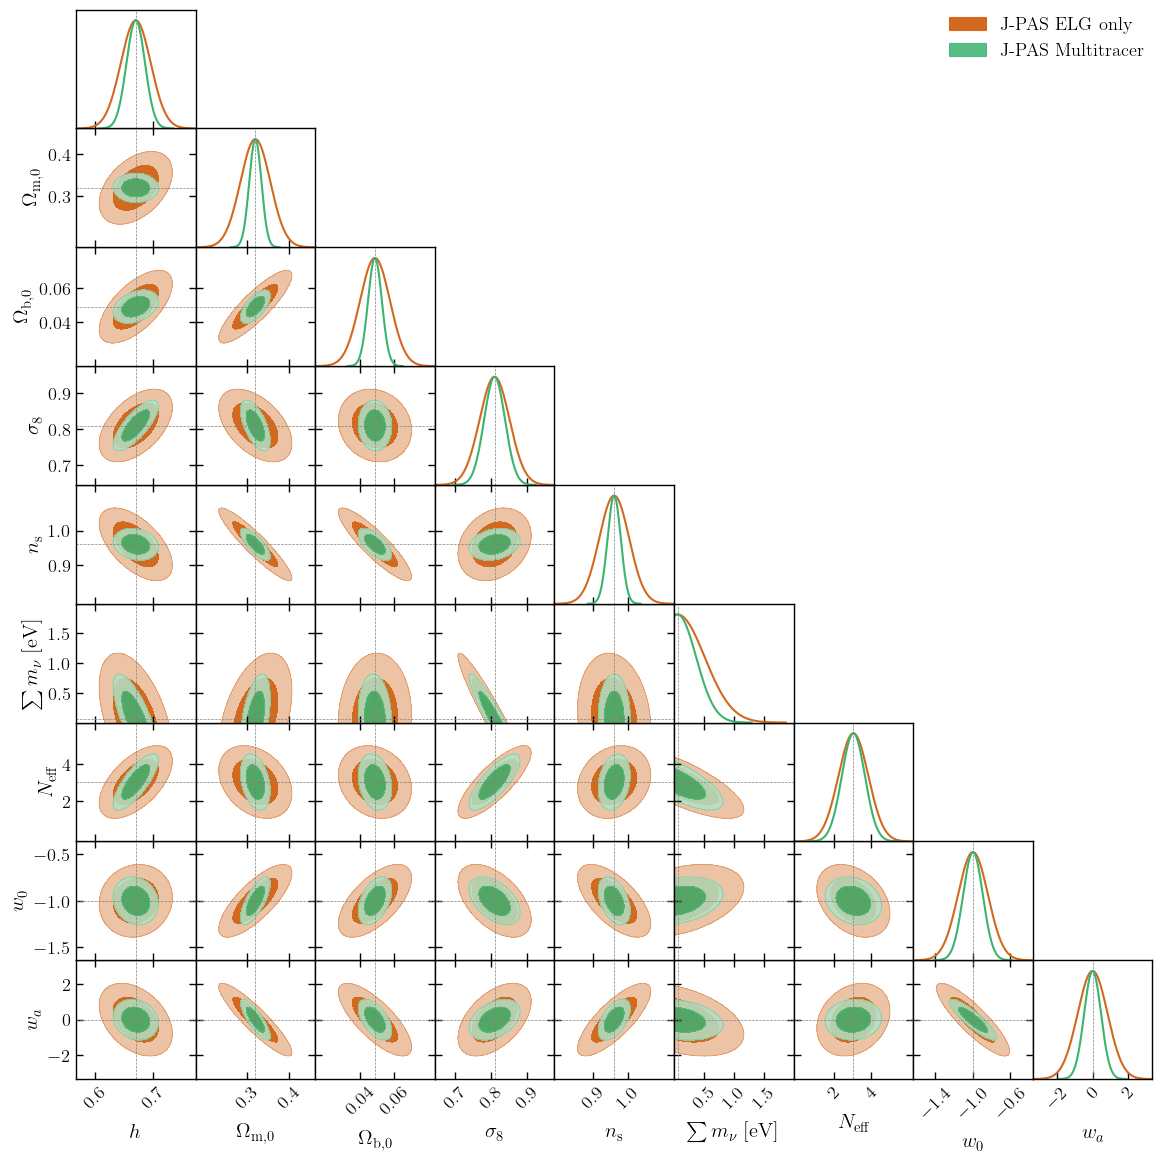

In [9]:
sns.set_context('paper',font_scale=2)
palette=sns.color_palette(['chocolate','mediumseagreen',])
ploter=plots.get_subplot_plotter(width_inch=12,rc_sizes=True)
ploter.settings.tight_layout=True
ploter.settings.axis_tick_x_rotation=45
ploter.settings.figure_legend_frame=False
ploter.triangle_plot(
    gauss,
    params=orders,
    param_limits={r'$\sum m_\nu\;[\mathrm{eV}]$':(0,2)},
    markers=m,
    marker_args={'color':'gray'},
    filled=True,
    legend_labels=['J-PAS ELG only','J-PAS Multitracer'],
    contour_colors=palette,
    contour_lws=[1.5,1.5,1.5,1.5],
    legend_loc='upper right')

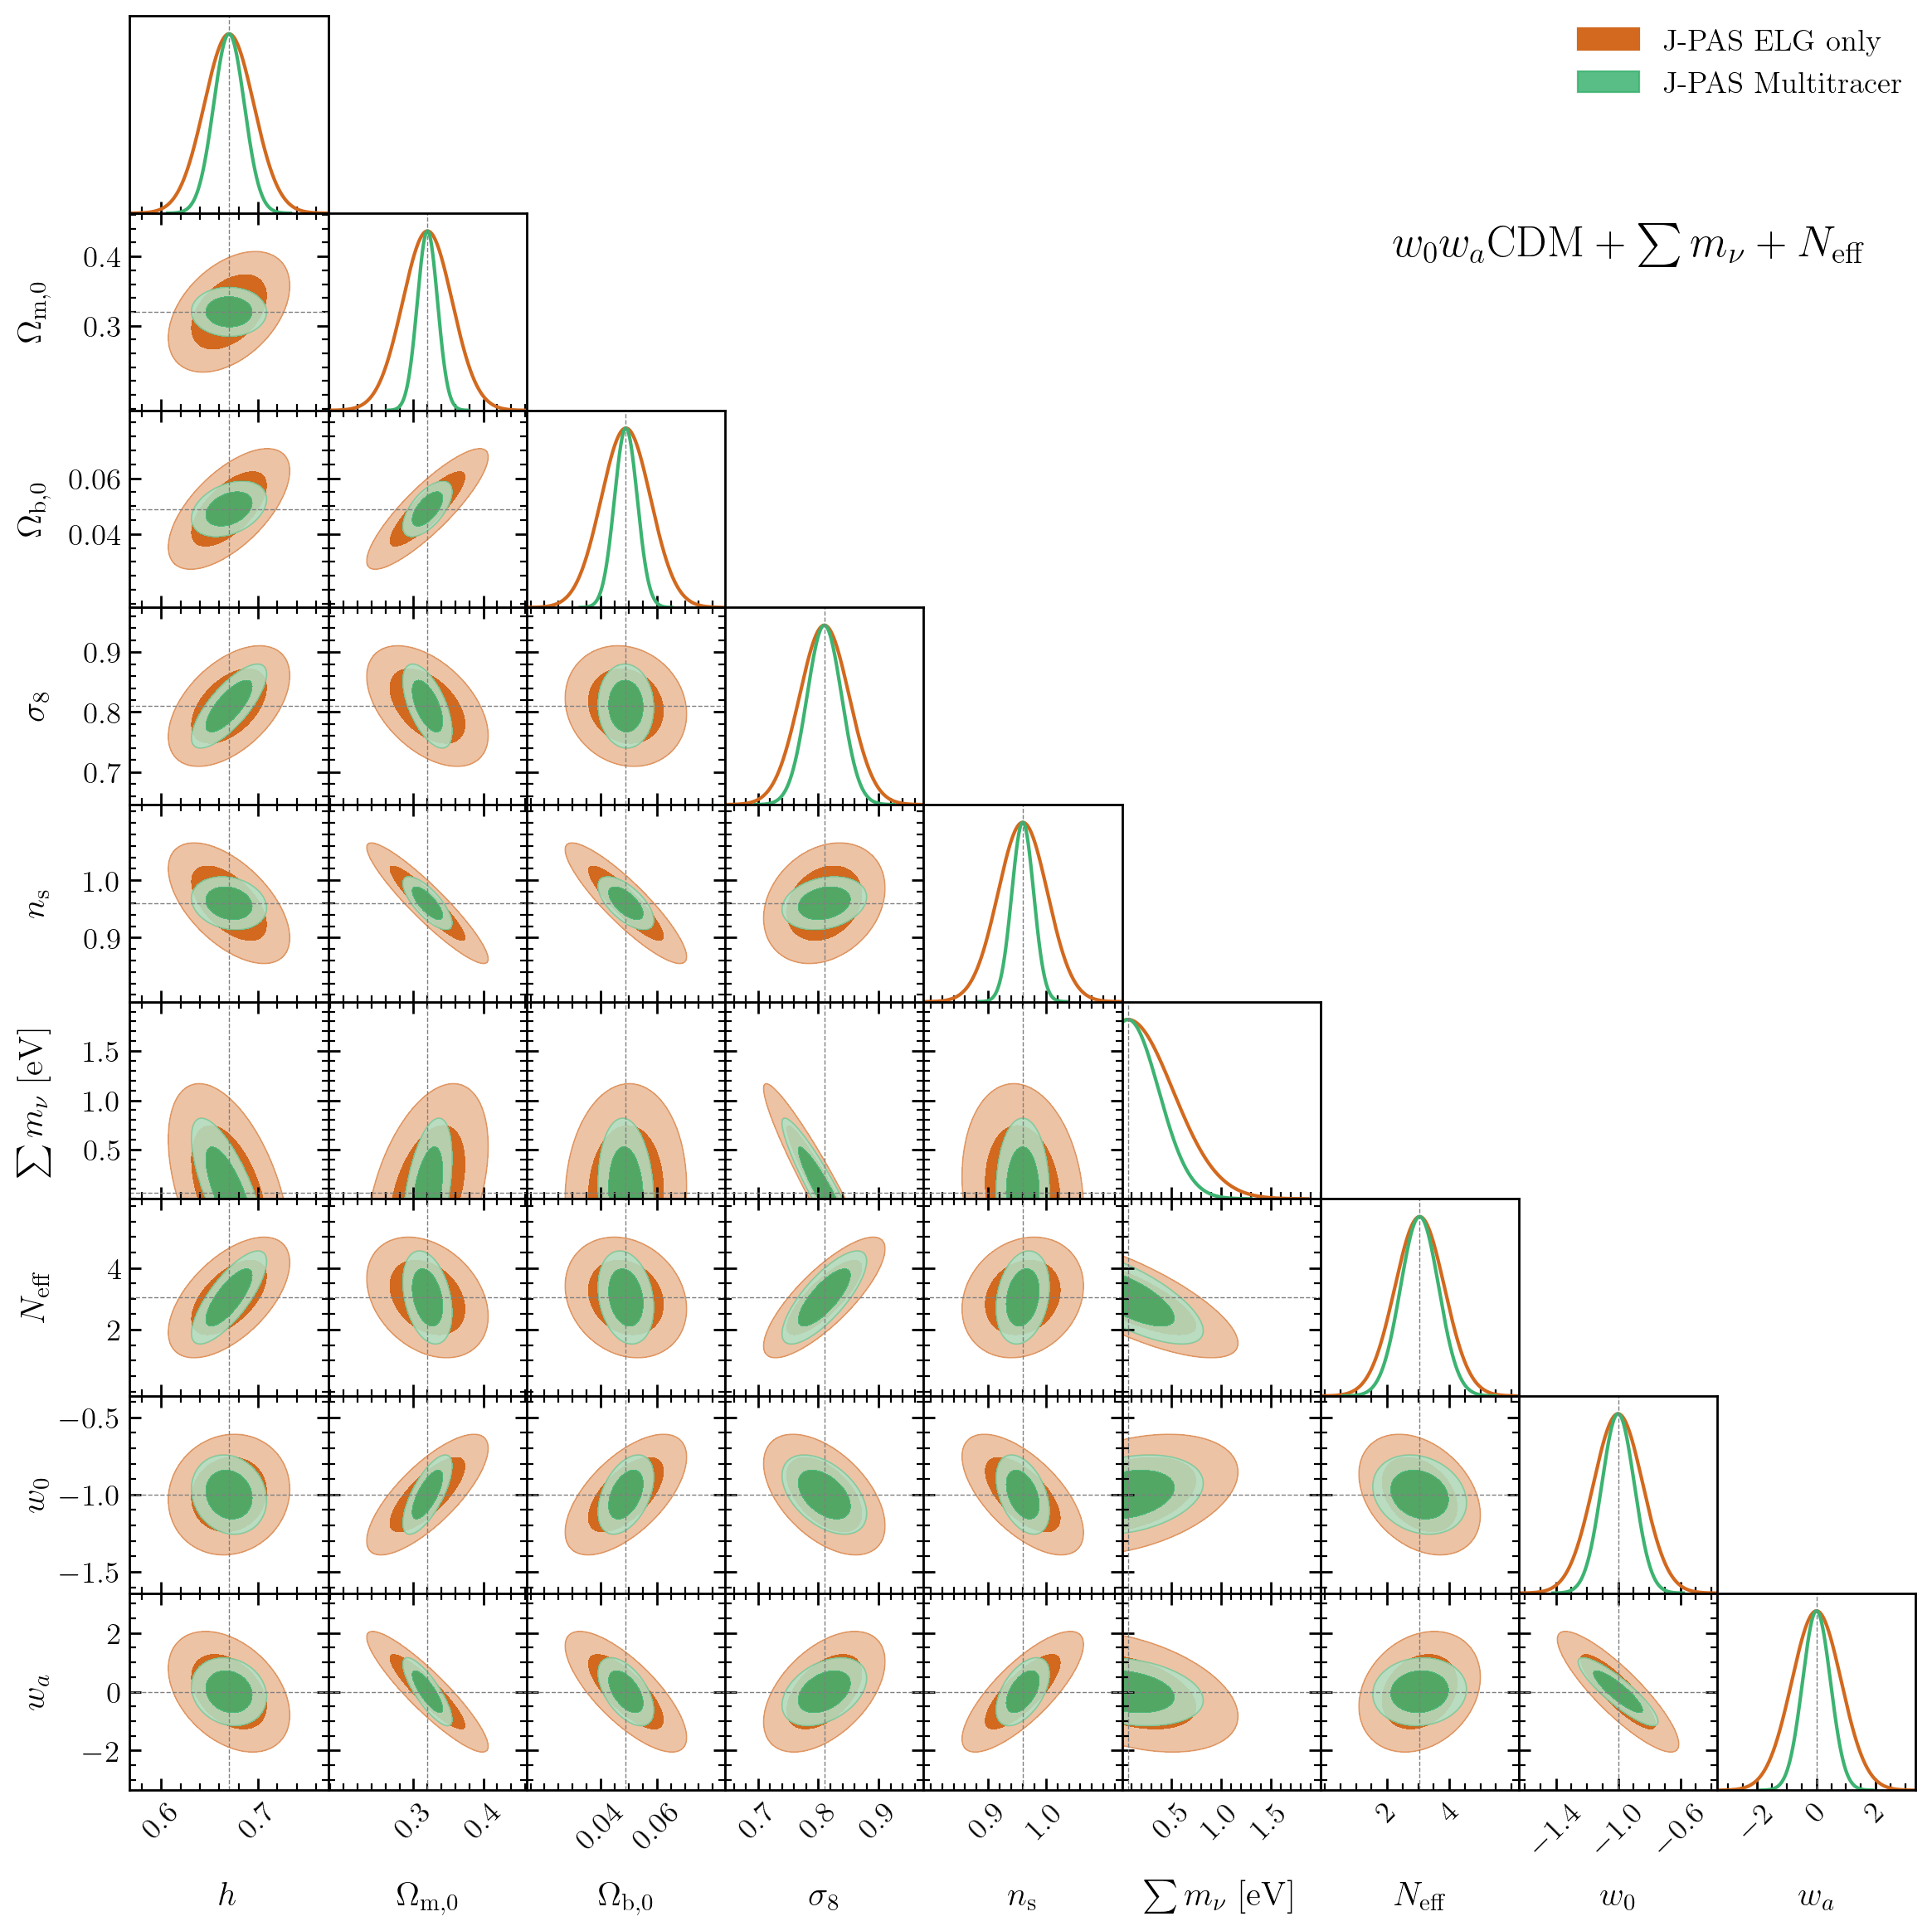

In [10]:
ploter.fig.set_dpi(200)
ploter.fig.align_labels()
for ax in ploter.fig.axes:
    ax.minorticks_on()
    ax.tick_params(which='major',length=5)
    ax.tick_params(which='minor',length=3)
y=len(orders)
axes=[]
start=0
for x in range(len(orders)):
    axes.append(ploter.fig.axes[start:start+y])
    start+=y
    y-=1
for col in axes:
    col[-1].yaxis.minorticks_off()
ploter.fig.text(0.95,0.85,r'$w_0w_a\mathrm{CDM}+\sum m_\nu+N_\mathrm{eff}$',horizontalalignment='right', verticalalignment='bottom')
ploter.fig

In [11]:
ploter.export('w0wacdm_multitracer-ELG.pdf','../../fig/w0wacdm')